####GOAL

**S condition**: Determine the wavefunction, the energy, the probability (maybe) of a particle in a rectangle triangular box.

**S+ condition**: Add an electric field and see what will happen.

**What to do ?**:
- ✔️ Create a repository for everybody ! (even Paul and Rick so that they can check)
- ✔️ Establish the box shape and give the boundaries condition
    - code a graph for it
- Solve the schrodinger equation using the boundary condition and chebyshev (refer to the sloped bottom particle in a box exercice)
  - ✔️ write out equation rearranged // derived in markup text
  - write in code
- Determine the energy if possible and eigenfunction




In [ ]:
import scipy
import numpy as np
import math
import matplotlib.pyplot as plt

The Boundary conditions are depicted below:

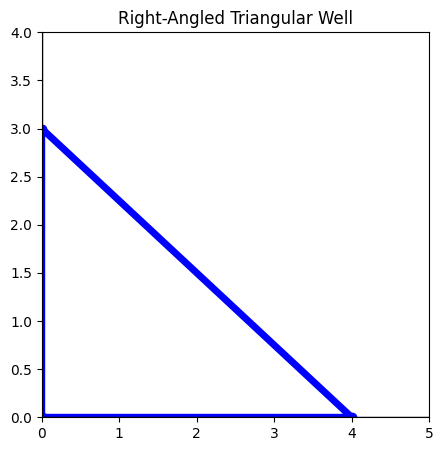

In [ ]:
# Define the triangle vertices (right-angled at the origin)
x = [0, 4, 0, 0]  # x-coordinates
y = [0, 0, 3, 0]  # y-coordinates

# Create the plot
plt.figure(figsize=(5,5))
plt.plot(x, y, 'bo-', linewidth=5)  # Plot triangle edges

# Set limits and grid
plt.xlim(0, 5)
plt.ylim(0, 4)
plt.grid(True, linestyle='', alpha=0.6)
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.title("Right-Angled Triangular Well")
plt.show()

Boundary Conventions:
$$
V(x) =
\begin{cases}
    +\infty & x\leq 0\\
    0       & 0\lt x \lt a
    \\
    +\infty & a \leq x
\end{cases}
$$

$$
V(y) =
\begin{cases}
    +\infty & y\leq 0\\
    0       & 0\lt y \lt b
    \\
    +\infty & b \leq y
\end{cases}
$$




Hamiltonian specific to the box:
$$ \hat{H} = - \frac{\hbar^2}{2m} \frac{d^2}{dx^2} - \frac{\hbar^2}{2m} \frac{d^2}{dy^2} +V(x,y) $$

$$ \hat{H}_{inbox} = - \frac{\hbar^2}{2m} * (\frac{d^2}{dx^2} + \frac{d^2}{dy^2})  $$

Equation of the box:
$$ \hat{H}*\Psi(x,y) = E\Psi(x,y)$$



#### **The Real Right-angle box**

To properly solve this equation we need to use what we call Chebyshev polynmials and expand them into a basis. The Chebyshev best work in between [-1,+1] domain, so to get have an easier time some changes on the above box is require to make it fit between [-1,+1]. We will get:    

**The boundaries equations**

Originally we have:
$$
0 < x < a
$$
$$
0 < y < b
$$
$$
Y =  -\frac{b}{a} x + b
$$

Now we have:
$$
\tilde{x} = -1 +\frac{2x}{a}
$$
$$
\tilde{y} = -1 +\frac{2y}{b}
$$
$$
\tilde{Y} = -\tilde{x} +1
$$

Each of these equations can be explained, for the first two equation. When y or x is equal to 0 the result of the equation will be -1 and when x is equal to a or y is equal to b, the result of the equation will be +1.
As for the last equation we follow linear function going from  $\tilde{x}$ at -1 to +1 and $\tilde{y}$ going from +1 to -1, leading to the equation we have.

This shows the new boundary of the box and the new equations used to determine the position inside the box as it can be seen below.

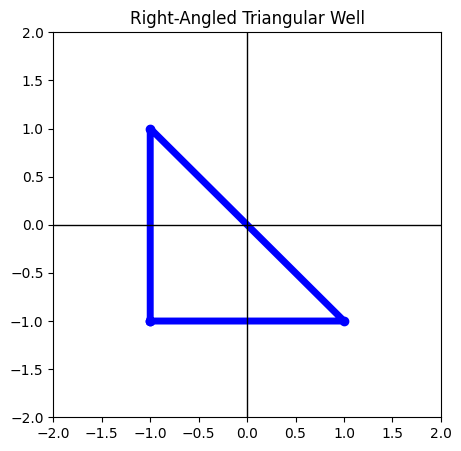

In [ ]:
# Define the triangle vertices (right-angled at the origin)
x = [-1, -1, 1, -1]  # x-coordinates
y = [-1, 1, -1,  -1]  # y-coordinates

# Create the plot
plt.figure(figsize=(5,5))
plt.plot(x, y, 'bo-', linewidth=5)  # Plot triangle edges

# Set limits and grid
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid(True, linestyle='', alpha=0.6)
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.title("Right-Angled Triangular Well")
plt.show()

The new boundary conventions:

$$
V(\tilde{x}) =
\begin{cases}
    +\infty & \tilde{x}\leq -1\\
    0       & -1\lt \tilde{x} \lt 1
    \\
    +\infty & 1 \leq \tilde{x}
\end{cases}
$$

$$
V(\tilde{y}) =
\begin{cases}
    +\infty & \tilde{y}\leq -1\\
    0       & -1\lt \tilde{y} \lt 1
    \\
    +\infty & 1 \leq \tilde{y}
\end{cases}
$$

According to the new bondary conventions, we will get a boundary equation (the equation that will give 0 when we are located in one of the side of the box) looking like:
$$
(\tilde{y}+1)(\tilde{x}+1)(\tilde{x}+\tilde{y}-1)
$$

Implementing this witht the Chebyshevs polynomial in the wavefunction will we obtain:
$$
(- \frac{\hbar^2}{2m} \frac{d^2}{dx^2} - \frac{\hbar^2}{2m} \frac{d^2}{dy^2})∑c_{nm} T_{m(\tilde{x})}T_{n(\tilde{y})}(\tilde{y}+1)(\tilde{x}+1)(\tilde{x}+\tilde{y}-1)
$$

To simplify the equation and make it easier to read we can say that:
$$
B_{mn}(\tilde{x},\tilde{y}) = T_{m(\tilde{x})}T_{n(\tilde{y})}(\tilde{y}+1)(\tilde{x}+1)(\tilde{x}+\tilde{y}-1)
$$
As this part basically represent the basis for the futur matrice that we are going to expand.

So we get:
$$
(- \frac{\hbar^2}{2m} \nabla^2)∑c_{nm}B_{mn}(\tilde{x},\tilde{y}) = E * ∑c_{nm}B_{mn}(\tilde{x},\tilde{y})
$$

However the laplacian is still express as a matter of $\frac{d^2}{dx^2}$ we have to change this to get it express as $\frac{d^2}{d\tilde{x}^2}$:
$$
\frac{dx}{d\tilde{x}}\frac{d}{dx}=\frac{d}{d\tilde{x}}
$$
<br>
$$
\frac{d\tilde{x}}{dx}\frac{d}{d\tilde{x}}=\frac{d}{dx}
$$
<br>
$$
\frac{2}{a}\frac{d}{d\tilde{x}}=\frac{d}{dx}
$$
<br>
$$
\frac{4}{a^2}\frac{d^2}{d\tilde{x}^2}=\frac{d^2}{dx^2}
$$
<br>

For $\frac{d^2}{d{y}^2}$ the result will be similar, we will get $\frac{4}{b^2}\frac{d^2}{d\tilde{y}^2}=\frac{d^2}{dy^2}$

<br>
So the overall equation will look like:

<br>
$$
(- \frac{\hbar^2}{2m} (\frac{4}{a^2}) \frac{d^2}{d\tilde{x}^2} - \frac{\hbar^2}{2m} (\frac{4}{b^2}) \frac{d^2}{d\tilde{y}^2})∑c_{nm}B_{mn}(\tilde{x},\tilde{y})=E * ∑c_{nm}B_{mn}(\tilde{x},\tilde{y})
$$
<br>

With:
$$
\Psi(x,y) = ∑c_{mm}B_{mn}(\tilde{x},\tilde{y})
$$
And:
<br>
$$
\tilde{\hat{H}}= (- \frac{\hbar^2}{2m} (\frac{4}{a^2}) \frac{d^2}{d\tilde{x}^2} - \frac{\hbar^2}{2m} (\frac{4}{b^2}) \frac{d^2}{d\tilde{y}^2})
$$

#### Expand the basis and solve the secular equation of the system

Starting with what we obtain lastly:

$$
\Psi(x,y) = ∑c_{nm}B_{mn}(\tilde{x},\tilde{y})
$$
<br>
$$
\tilde{\hat{H}}= (- \frac{\hbar^2}{2m} (\frac{4}{a^2}) \frac{d^2}{d\tilde{x}^2} - \frac{\hbar^2}{2m} (\frac{4}{b^2}) \frac{d^2}{d\tilde{y}^2})
$$

We multiply on the left by $B_{jk}(\tilde{x}\tilde{y})$ and we do a double integration over the spaces looking like:
$$
∑[∫_{-1}^{1}∫_{-1}^{-\tilde{y}}B_{jk}(\tilde{x}\tilde{y})*\tilde{\hat{H}}B_{mn}(\tilde{x},\tilde{y})d\tilde{x}d\tilde{y}]c_{mn} = E∑[∫_{-1}^{1}∫_{-1}^{-\tilde{y}}B_{jk}(\tilde{x}\tilde{y})*B_{mn}(\tilde{x},\tilde{y})d\tilde{x}d\tilde{y}]c_{mn}
$$
<br>
This could be simplified by saying:
<br>
$$
H=∫_{-1}^{1}∫_{-1}^{-\tilde{y}}B_{jk}(\tilde{x}\tilde{y})*\tilde{\hat{H}}B_{mn}(\tilde{x},\tilde{y})d\tilde{x}d\tilde{y}
$$
<br>
$$
S = ∫_{-1}^{1}∫_{-1}^{-\tilde{y}}B_{jk}(\tilde{x}\tilde{y})*B_{mn}(\tilde{x},\tilde{y})d\tilde{x}d\tilde{y}
$$
<br>
This will gives us a generalized matrix eigenvalue problem:
$$ Hc=ESc$$
<br>
And solving those integrals will allow us to find the eigenvalues of the system.

**Important to note:** The lowest eigenvalue will always be greater than or equal to the true energy value of the ground-state energy.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

from scipy.integrate import dblquad
from scipy.linalg import eigh
from scipy.optimize import minimize
from numpy.polynomial import Chebyshev as T

## Determine the box parameter (max length is two)
def box_parameter(a,b):
  if a > 2 or a < 0:
    print("The length parameter a for the box is too small or too big, please change the value to be between 0 and 2")
  elif b > 2 or b < 0:
    print("The height parameter b for the box is too small or too big, please change the value to be between 0 and 2")
  else:
    return a,b

## Change down the cooridnate so that it will work better for Chebyshev polynomial
def new_box_parameter(x,y,a,b):
  tilde_x = (-1 + 2*x/a)
  tilde_y = (-1 + 2*y/b)
  return tilde_x, tilde_y

## Set the boundary equation of the
def boundary_equation(tilde_x,tilde_y):
  boundary_eq = (tilde_y+1)*(tilde_x+1)*(tilde_x+tilde_y-1)
  return boundary_eq

## Define the bassis function
def basis_function(m, n, tilde_x,tilde_y):
  T_m = T.basis(m)(tilde_x)
  T_n = T.basis(n)(tilde_y)

  B_mn = T_m*T_n*boundary_equation(tilde_x,tilde_y)
  return B_mn

# Precompute basis function evaluations
def compute_basis_functions(N):
    def basis_func_wrapper(m, n):
        return lambda x, y: basis_function(m, n, x, y)

    return np.array([
        [basis_func_wrapper(m, n) for n in range(N)]
        for m in range(N)
    ])


# Compute the Chebyshev differentiation matrix
def chebyshev_diff_matrix(N):
    """
    Compute the Chebyshev differentiation matrix for N+1 points.
    """
    x = np.cos(np.pi * np.arange(N + 1) / N)  # Chebyshev nodes
    c = np.ones(N + 1)
    c[0] = c[-1] = 2  # Special weight for endpoints
    C = np.tile(c, (N + 1, 1))
    X = np.tile(x, (N + 1, 1)).T
    D = (C / C.T) / (X - X.T + np.eye(N + 1))  # Compute differentiation matrix
    D -= np.diag(np.sum(D, axis=1))  # Enforce zero row sum
    D2 = np.dot(D, D)  # Compute second derivative matrix
    return D, D2, x  # Return second derivative matrix too

# Compute second derivatives using the Chebyshev differentiation matrix
#def second_derivative_chebyshev(f_coeffs, D):
    """
    Compute the second derivative of f using the Chebyshev differentiation matrix.
    """
    #D2 = np.dot(D, D)  # Second derivative matrix
    #return np.dot(D2, f_coeffs)  # Apply to function coefficients


#Def the Hamiltonian part of the equation
def hamiltonian_matrix(N, a, b, D2_x, D2_y, basis_function):
    H = np.zeros((N*N, N*N))

    for j in range(N):
        for k in range(N):
            for m in range(N):
                for n in range(N):
                    # Define the integrand
                    def integrand(tilde_x, tilde_y):
                        B_jk = basis_functions[j][k](tilde_x, tilde_y)
                        B_mn = basis_functions[m][n](tilde_x, tilde_y)

                        # Apply Chebyshev second derivative matrices
                        d2Bdx2 = sum(D2_x[j, p] * basis_functions[p, k](tilde_x, tilde_y) for p in range(N+1))
                        d2Bdy2 = sum(D2_y[k, q] * basis_functions[j, q](tilde_x, tilde_y) for q in range(N+1))

                        Hmn = - (4 / a**2) * d2Bdx2 - (4 / b**2) * d2Bdy2  # Laplacian part

                        return B_jk.conjugate() * Hmn * B_mn  # Multiply by B*_jk

                    # Compute double integral over the domain
                    H_jk_mn, _ = dblquad(integrand, -1, 1, lambda x: -1, lambda x: tilde_x)

                    H[j * N + k, m * N + n] = H_jk_mn

    return H


#Def the overlap matrix
# Compute the overlap matrix
def overlap_matrix(N, basis_functions):
    S = np.zeros((N*N, N*N))

    for j in range(N):
        for k in range(N):
            for m in range(N):
                for n in range(N):
                    def integrand(tilde_x, tilde_y):
                        B_jk = basis_functions[j][k](tilde_x, tilde_y)
                        B_mn = basis_functions[m][n](tilde_x, tilde_y)
                        return np.conjugate(B_jk) * B_mn  # Overlap term

                    S_jk_mn, _ = dblquad(integrand, -1, 1, lambda x: -1, lambda x: tilde_x)
                    S[j * N + k, m * N + n] = S_jk_mn

    return S

def solve_eigenproblem(H, S):
    # Solve generalized eigenvalue problem Hc = EcS
    E, C = eigh(H, S)
    return E, C

In [9]:
#Check if the box parameter are correct
a = 2
b = 1.5
box_parameter(a,b)
#New equation
#x_tilde, y_tilde = new_box_parameter(x,y,a,b)

# Basis function storage
#N = #number of basis
#basis_functions = compute_basis_functions(N)

# Compute Hamiltonian and Overlap matrices
#H = hamiltonian_matrix(N, a, b, D2_x, D2_y, basis_functions)
#S = overlap_matrix(N, basis_functions)

# Solve for eigenvalues and eigenvectors
#E, C = solve_eigenproblem(H, S)

# Print lowest eigenvalues (ground state and excited states)
#print("Eigenvalues (Energy Levels):", E[:10])  # Print first 10 energy levels

(2, 1.5)